# All Activationg functions and their Drivatives

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline
# plt.rcParams["animation.html"]='jshtml'

### Sigmoid

In [64]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [65]:
def derivative_sigmoid (Z):
    return Z *(1-Z)

### Tanh

In [66]:
def tanh(Z):
    return (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))

In [67]:
def derivative_tanh(Z):
    return 1-Z**2

### ReLU

In [68]:
def ReLU(Z):
    return np.maximum(0,Z)

In [142]:
def derivative_ReLU(Z):
    return  np.where(Z>0,1,0)

### Leaky ReLU

In [70]:
def Leaky_ReLU(Z):
    return np.where(Z>0,Z,0.01*Z)

In [146]:
def derivative_Leaky_ReLU(Z):
    return np.where(Z>0,1,0.01)

### ELU

In [72]:
def ELU(Z):
    return np.where(Z>0,Z,(0.01*(np.exp(Z)-1)))

In [73]:
def derivative_ELU(Z):
    return np.where(Z>0,1,(0.1*(np.exp(Z))))

### PReLU

In [74]:
def PReLU(Z,alpha):
    return np.where(Z>0,Z,alpha*(Z))

In [75]:
def derivative_LReLU(Z):
    return np.where(Z>0,1,alpha)

### Softplus

In [76]:
def softplus(Z):
    return np.log(1+np.exp(Z))

In [77]:
def derivative_softplus(Z):
    return np.exp(Z)/(1+np.exp(Z))

### Swish

In [156]:
def Swish(Z):
    return Z*(1/(1+np.exp(-Z)))

In [79]:
def derivative_Swish(Z):
    return  Z*(sigmoid(Z)*(1-sigmoid(Z)))+sigmoid(Z)

### Maxout

In [176]:
def Maxout(Z):
    for i in range(Z.shape[0]):
        ind=np.argmax(Z[i])
        row=Z[i,ind]
        Z[i]=np.where(Z[i]!=row,0,row)
    return Z

In [177]:
def derivative_Maxout(Z):
    for i in range(Z.shape[0]):
        ind=np.argmax(Z[i])
        row=Z[i,ind]
        Z[i]=np.where(Z[i]!=row,0,1)
    return Z

### Softmax

In [178]:
def softmax(Z):
    expA=np.exp(Z-np.max(Z))
    return expA/expA.sum(axis=1,keepdims=True)

In [179]:
def derivative_softmax(Z):
    return Z*(1-Z)

### Preparing the data

In [211]:
# Simple Xor function

X=np.array([[1,1],[1,0],[0,1],[0,0],[1,1],[1,0],[0,1],[0,0],[1,1],[1,0],[0,1],[0,0]])
y=np.array([0,1,1,0]*3)

# Creating DF
data=pd.DataFrame(data=X,columns=[f'X{i}' for i in range(X.shape[1])])
data["y"]=y

In [212]:
data

,X0,X1,y
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0
5,1,0,1
6,0,1,1
7,0,0,0
8,1,1,0
9,1,0,1


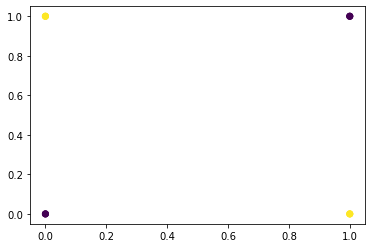

In [195]:
# Ploting the data

plt.scatter(X[:,0],X[:,1],c=y)

# Building Neural Network from scratch

### One Hot Encoder

In [183]:
def one_hoty(y):
    z=np.zeros((len(y),len(np.unique(y))),dtype=int)
    for i in range(len(y)):
        z[i,y[i]]=1
    return z

### Weight Initializing - He Normal

In [197]:
def _init_param(X,y,hidden):
    W1=np.random.normal(loc=0,scale=np.sqrt(2/(X.shape[1])),size=(X.shape[1],hidden[0]))
    b1=np.random.normal(loc=0,scale=np.sqrt(2/(X.shape[1])),size=hidden[0])
    W2=np.random.normal(loc=0,scale=np.sqrt(2/(hidden[0])),size=(hidden[0],len(np.unique(y))))
    b2=np.random.normal(loc=0,scale=np.sqrt(2/(hidden[0])),size=len(np.unique(y)))
    return W1,b1,W2,b2

### Forward Probagation

> We need to Change the activation function manually

> Feel free to change and check how each activation function works

In [198]:
def forward_probagation(X,W1,b1,W2,b2):
    #Input Layer
    Z1=np.dot(X,W1)+b1
    
    # Hidden Layer
    Activation1=Maxout(Z1)
    
    Z2=np.dot(Activation1,W2)+b2
    
    # Output layer
    YP=softmax(Z2)
    
    return Z1,Activation1,Z2,YP

### Backward Probagation

In [199]:
def Back_probagation(X,y,W2,A1,YP,derivative_act):
    dW2=(-(y-YP)).T.dot(A1)
    db2=(-(y-YP)).sum(axis=0)
    dW1=(-((y-YP).dot(W2.T)*(derivative_act))).T.dot(X)
    db1=(-((y-YP).dot(W2.T)*derivative_act)).sum(axis=0)
    return dW2,db2,dW1,db1

### Weight Updation

In [200]:
def update_weights(W1,b1,W2,b2,dW2,db2,dW1,db1,lr):
    W1=W1-(lr*dW1.T)
    b1=b1-(lr*db1)
    W2=W2-(lr*dW2.T)
    b2=b2-(lr*db2)
    return W1,b1,W2,b2

### Prediction

In [201]:
def predict1(X,W1,b1,W2,b2):
    _,_,_,YP=forward_probagation(X,W1,b1,W2,b2)
    res=np.zeros(YP.shape[0],dtype=int)
    for i in range(YP.shape[0]):
        if YP[i,0]>YP[i,1]:
            res[i]=0
        else:
            res[i]=1
    return res

### Training 

> Note: Here we need to change the derivative of the activation function manually

In [214]:
def trainining(X,y,n_hidden,lr,iterration,plot=False):

# We can see the step by step transformation by setting plot = True    
    
    if plot:
        fig=plt.figure(1,(13,5))
        ax1=fig.add_subplot(141)
        ax2=fig.add_subplot(142)
        ax3=fig.add_subplot(143)
        ax4=fig.add_subplot(144)
    
# Weight initialization
    W1,b1,W2,b2=_init_param(X,y,n_hidden)
    
# Converting y into one hot vector
    y1=one_hoty(y)
    
    for i in range(iterration):
        
# Forward pass
        Z1,A1,Z2,YP=forward_probagation(X,W1,b1,W2,b2)
        
# Computing Cost
        cost=-(np.sum(y1*(np.log(YP))+((1-y1)*(np.log(1-YP)))))

# Ploting the transformation
        if plot:
            ax1.scatter(X[:,0],X[:,1],c=y)
            ax2.scatter(A1[:,0],A1[:,1],c=y)
            ax3.scatter(Z2[:,0],Z2[:,1],c=y)
            ax4.scatter(YP[:,0],YP[:,1],c=y)
            fig.canvas.draw()

# Computing gradient of activation function             >>>>>> (" Need to change when we change the activation function")
        derivative_activation=derivative_Maxout(A1)
    
# Backward function
        dW2,db2,dW1,db1=Back_probagation(X,y1,W2,A1,YP,derivative_activation)
    
# Updating Weight
        W1,b1,W2,b2=update_weights(W1,b1,W2,b2,dW2,db2,dW1,db1,lr)
        
#     print(cost)
    return W1,b1,W2,b2

### Training the model

In [203]:
W1,b1,W2,b2=trainining(X,y,[10],0.01,1000)

### Testing the model

In [204]:
y_predicted=predict1(X,W1,b1,W2,b2)

### Accuracy

In [205]:
sum(y_predicted==y)/len(y)

1.0

# i have checked all the activation function, and  did not get any error 